In [59]:
import os
import pandas as pd
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
from matplotlib import pyplot as plt

A ideia, até agora, é começar a organizar os dados que serão processados pelo modelo. Pensamos em modificar um pouco o cálculo do chroma, de maneira que seja realizado a partir da detecção do tempo da música. 
Assim, a princípio, ele estaria diretamente relacionado à mudança de harmonia, tornando mais fácil a captação das principais frequências.

audio -> beat detection -> chroma

In [50]:
# y, sr = librosa.load(librosa.ex('choice'), duration=10)
y, sr = librosa.load('../../big_corpus/wav_music21/MoonRiver.wav'
#                      , duration=20
                    )

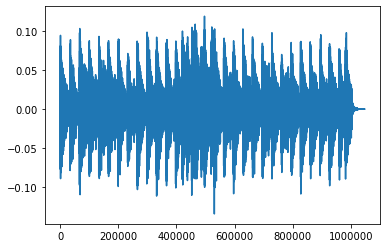

In [42]:
plt.plot(y)

In [43]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

In [44]:
tempo

39.75360576923077

In [45]:
ipd.Audio(y, rate=sr)

In [46]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         aggregate=np.median)

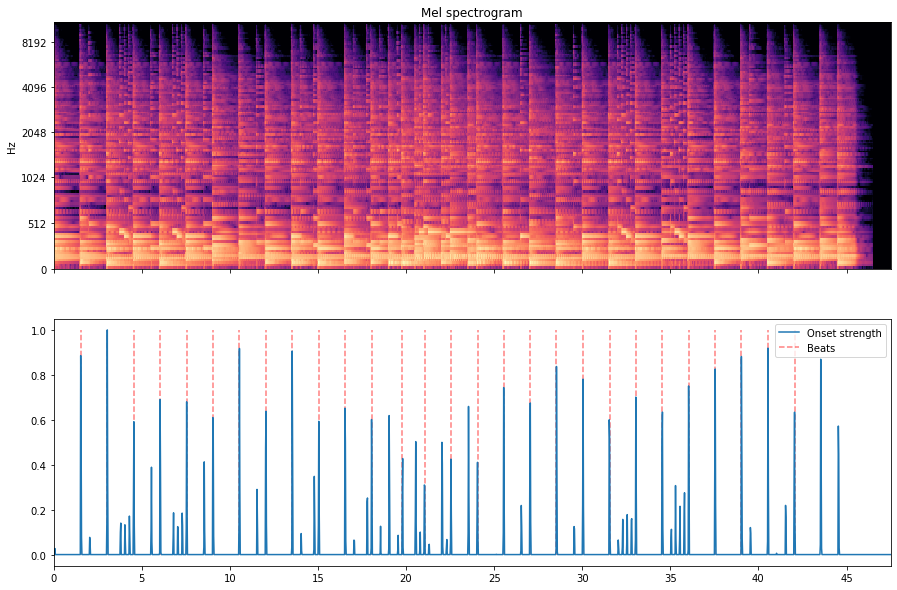

In [48]:
hop_length = 512

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,10))
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)

librosa.display.specshow(librosa.power_to_db(M, ref=np.max),
                         y_axis='mel', x_axis='time', hop_length=hop_length,
                         ax=ax[0])

ax[0].label_outer()
ax[0].set(title='Mel spectrogram')

ax[1].plot(times, librosa.util.normalize(onset_env),
         label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.5, color='r',
           linestyle='--', label='Beats')

ax[1].legend()

In [53]:
beats

array([  66,  131,  196,  260,  325,  390,  454,  519,  583,  648,  712,
        777,  852,  907,  971, 1036, 1100, 1165, 1229, 1294, 1359, 1423,
       1488, 1552, 1617, 1681, 1746, 1811])

Fiz alguns testes aí em cima.. mas a princípio vamos abortar a ideia do beat tracker pra audios gerados. Vamos simplesmente pegar os trechos em que sabemos a harmonia e gerar um chroma pra cada trecho. Com isso, procuramos automatizar o aprendizado dos acordes em seus vários formatos.

In [64]:
chords = pd.read_csv('../corpus/chords_sequences/MoonRiver.csv')
chords

,Measure,MoonRiver,Time
0,1,Cmaj7,0.00
1,2,Amin7,1.50
2,3,F7,3.00
3,4,Cmaj7,4.50
4,5,F7,6.00
5,6,Cmaj7,7.50
6,7,Bmin7,9.00
7,8,E7,10.50
8,9,Amin7,12.00
9,10,C7/G,13.50


In [67]:
for i in chords.index[:-1]:
    print(i, i+1)
    

In [ ]:
N, H = 2048, 1024

counter = 0
for time in times[beats]:
    if counter == 0:
        C_time = librosa.feature.chroma_stft(y=x_example, 
                                                sr=Fs, 
                                                tuning=0, 
                                                norm=None, 
                                                hop_length=H, 
                                                n_fft=N)
    else:
        
    counter +=1

In [61]:
pd.DataFrame(columns=['Time'], data=times[beats])

,Time
0,1.532517
1,3.041814
2,4.551111
3,6.037188
4,7.546485
5,9.055782
6,10.541859
7,12.051156
8,13.537234
9,15.046531


In [62]:
'C7'.split('/')

['C7']

In [63]:
'C/G'.split('/')

['C', 'G']

In [57]:
len(onset_env)

2046